**1. Import thư viện và tập dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

#Thuật toán: Linear regression, decision tree, random forest
#Phương pháp đánh giá: MAE, MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
orig_df = pd.read_csv('kc_house_data.csv', index_col='id')

In [ ]:
orig_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [ ]:
orig_df = pd.read_csv('kc_house_data.csv')
house_df_eda = orig_df.copy(deep=True)

In [ ]:
house_df_eda.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
print('Number of Rows: {}'.format(house_df_eda.shape[0]))
print('Number of Columns: {}'.format(house_df_eda.shape[1]))

Number of Rows: 21613
Number of Columns: 21


**2. Tên thuộc tính và mô tả**

In [ ]:
# id - mã nhà (non-identity)

# date - ngày cuối cùng ngôi nhà được bán

# price - giá ngôi nhà khi bán

# bedrooms - số phòng ngủ

# bathrooms - số phòng tắm

# sqft_living - m^2 không gian bên trong ngôi nhà

# sqft_lot - m^2 đất

# floors - số tầng

# waterfront - if there is a waterview from the house

# view - thang từ 0 -> 4, đánh giá nhà có view như thế nào

# condition - 

# grade - thang từ 1 -> 13, đánh giá chất lượng ngôi nhà (kiến trúc,...)

# sqft_above - m^2 ngôi nhà trên mặt đất

# sqft_basement - m^2 ngôi nhà dưới mặt đất

# yr_built - năm ngôi nhà được xây

# yr_renovated - năm trùng tu cuối cùng của ngôi nhà

# zipcode - mã zipcode tại ngôi nhà

# lat - chiều ngang ngôi nhà

# long - chiều dài ngôi nhà

# sqft_living15 - m^2 không gian bên trong ngôi nhà của 15 hàng xóm gần nhất

# sqft_lot15 - m^2 đất của 15 hàng xóm gần nhất


In [ ]:
house_df_eda.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**3. Xóa cột date vì không ảnh hưởng đến giá trị ngôi nhà**

In [ ]:
house_df_eda.drop("date", axis=1, inplace=True)

In [ ]:
#Hàm select_num_attr: chọn ra những thuộc tính có kiểu dữ liệu là integer và float
def select_num_attr(data: pd.DataFrame):
    
    return data.select_dtypes(include=['int64', 'float64'])

In [ ]:
num_attributes = select_num_attr(house_df_eda)

In [ ]:
num_attributes.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Summary Statistical functions

def descriptive_stats(data: pd.DataFrame, bound_dist: int): #Tên với cách tính mấy hàm này có gì bà mở slide PTDLKD ra xem nha bà
    
    mean = pd.DataFrame(data.mean())
    std = pd.DataFrame(data.std())
    median = pd.DataFrame(data.median())
    mode = pd.DataFrame(data.mode().T.iloc[:,0])

    q1,q3 = pd.DataFrame(data.quantile(0.25)), pd.DataFrame(data.quantile(0.75))
    
    iqr = q3[0.75] - q1[0.25]
    lower_bound, upper_bound = q1[0.25] - (bound_dist*iqr), q3[0.75] + (bound_dist*iqr)

    maximum = pd.DataFrame(data.max())
    minimum = pd.DataFrame(data.min())
    
    p1,p5,p95,p99 = pd.DataFrame(data.quantile(0.01)),pd.DataFrame(data.quantile(0.05)),pd.DataFrame(data.quantile(0.95)),pd.DataFrame(data.quantile(0.99))  

    skew = pd.DataFrame(data.skew())
    kurtosis = pd.DataFrame(data.kurtosis())

    descriptive_statistics = pd.concat([mean,std,minimum,p1,p5,lower_bound,q1,mode,median,q3,upper_bound,p95,p99,maximum,skew,kurtosis],axis=1)
    
    descriptive_statistics.columns = ['mean','std','minimum','p1','p5','lower_bound','q1','mode','median','q3','upper_bound','p95','p99','maximum',
                                      'skew','kurtosis']
    
    return descriptive_statistics
def group_descriptive_stats(data: pd.DataFrame, agg_feature: str, info_feature: str, bound_dist: int):
    
    grouped_data = data[[agg_feature,info_feature]].groupby(agg_feature)
    
    mean = grouped_data.mean()
    std = grouped_data.std()
    median = grouped_data.median()
    mode = grouped_data.agg([stats.mode]).apply(lambda x: x[0][0][0],axis=1)

    q1,q3 = grouped_data.quantile(0.25), grouped_data.quantile(0.75)
    
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - (bound_dist*iqr), q3 + (bound_dist*iqr)

    maximum = grouped_data.max()
    minimum = grouped_data.min()
    
    p1,p5,p95,p99 = grouped_data.quantile(0.01),grouped_data.quantile(0.05),grouped_data.quantile(0.95),grouped_data.quantile(0.99)
    
    skew = grouped_data.skew()
    kurtosis = grouped_data.apply(pd.DataFrame.kurt).drop(agg_feature,axis=1)
    
    grouped_descriptive_statistics = pd.concat([mean,std,minimum,p1,p5,lower_bound,q1,mode,median,q3,upper_bound,p95,p99,maximum,skew,kurtosis],axis=1)
    
    grouped_descriptive_statistics.columns = ['mean','std','minimum','p1','p5','lower_bound','q1','mode','median','q3','upper_bound','p95','p99','maximum','skew','kurtosis']
    
    return grouped_descriptive_statistics

def iqr(data, dist):
  
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    return data[(data < (Q1 - (dist * IQR))) | (data > (Q3 + (dist * IQR)))]

def number_iqr_outliers(data: pd.DataFrame,dist: int) -> pd.DataFrame:
    
    outliers = {}
    for feature in data.columns:
        outliers[feature] = iqr(num_attributes[feature], dist)
    num_outliers = [outliers[feature].shape[0] for feature in outliers.keys()]
    perc_records = [(n_outliers/data.shape[0])*100 for n_outliers in num_outliers]
    outliers_data = {'num_iqr_outliers':num_outliers,'perc_outlier_records':perc_records}
    iqr_outliers = pd.DataFrame(data=outliers_data, index=data.columns.to_list())
    
    return iqr_outliers

**4. Kiểm tra các giá trị rỗng, đồng thời lọc những ngôi nhà có id giống nhau (tức ngôi nhà được bán 2 lần trở lên), chỉ giữ lại ngôi nhà có bảng các thuộc tính mới nhất (tức mới được bán gần đây nhất)**

In [ ]:
#Kiểm tra giá trị rỗng ở từng cột
num_attributes.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
cat_attributes = house_df_eda.select_dtypes(exclude=['int64','float64'])

pd.isna(cat_attributes).sum()

Series([], dtype: float64)

In [ ]:
#Thống kê số lượng ngôi nhà (tức những nhà được bán 2 lần trở lên cũng chỉ tính là 1)
len(house_df_eda['id'].unique())

21436

In [ ]:
#Gán bộ dữ liệu gồm những ngôi nhà được bán 2 lần trở lên vào biến duplicated_ids
duplicated_ids = house_df_eda['id'].apply(lambda x: True if (sum(x == house_df_eda['id']) >= 2)\
                                                     else False)

In [ ]:
#Bỏ những ngôi nhà từ duplicated_ids, tức những nhà có id bằng nhau thì chỉ giữ lại duy nhất 1 căn có yr_renovated gần nhất
house_df_eda.loc[duplicated_ids,['id','price', 'yr_renovated','zipcode']].drop_duplicates(subset=['id'], keep='last')

,id,price,yr_renovated,zipcode
94,6021501535,700000.0,0,98117
314,4139480200,1400000.0,0,98006
325,7520000520,240500.0,1984,98146
346,3969300030,239900.0,0,98178
372,2231500030,530000.0,0,98133
...,...,...,...,...
20181,7853400250,645000.0,0,98065
20613,2724049222,220000.0,0,98118
20670,8564860270,502000.0,0,98045
20780,6300000226,380000.0,0,98133


**Biểu đồ phân phối**

In [ ]:
#Link tham khảo phân tích biểu đồ: https://www.youtube.com/watch?v=XuqU6FFQTu0&list=LL&index=1, phút 10:38

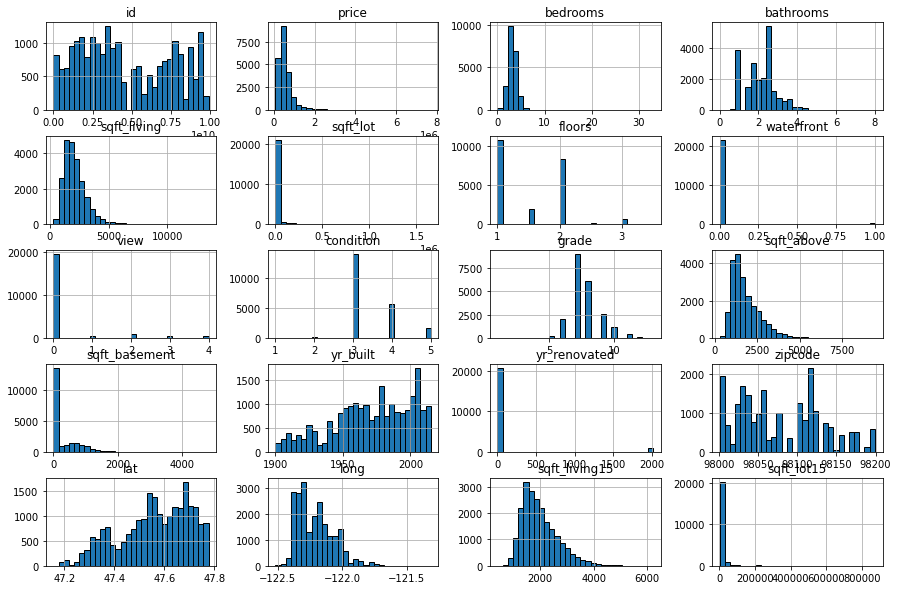

In [ ]:
house_df_eda.hist(figsize=(15,10), bins=30, edgecolor="black")
plt.show()

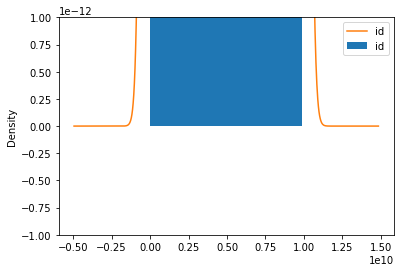

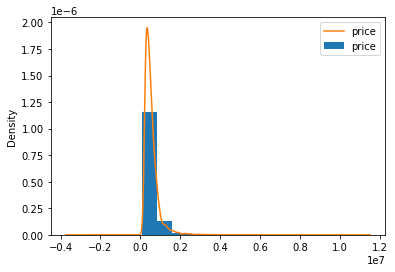

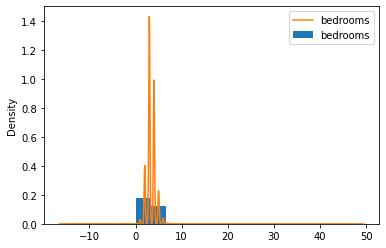

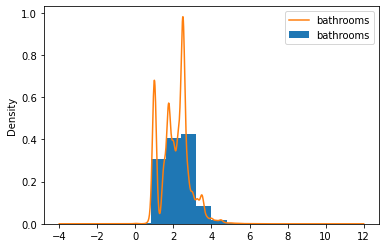

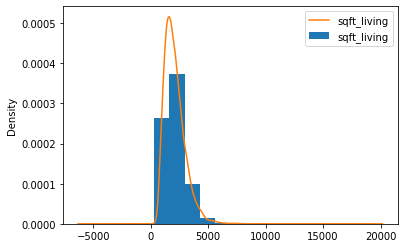

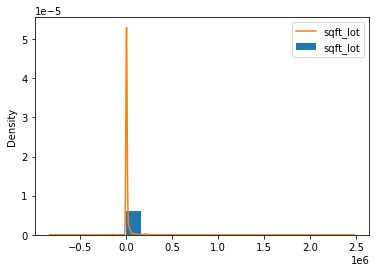

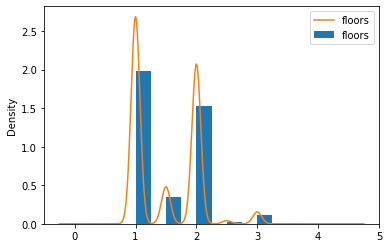

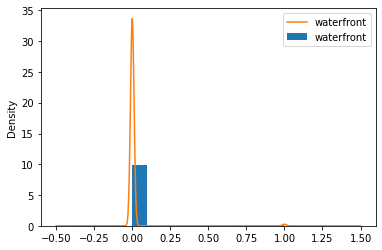

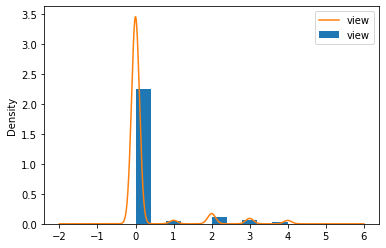

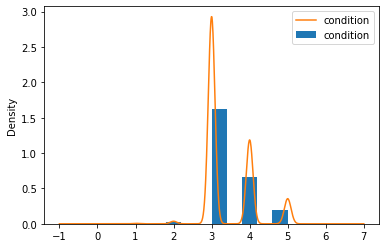

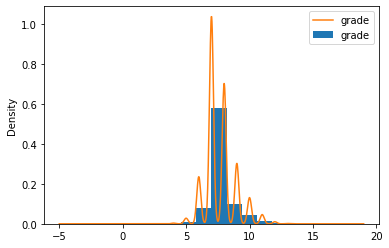

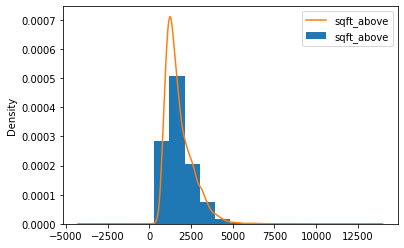

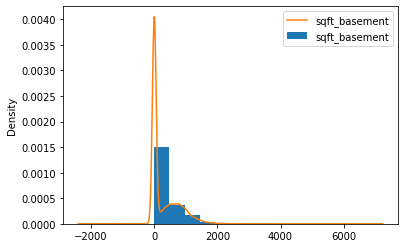

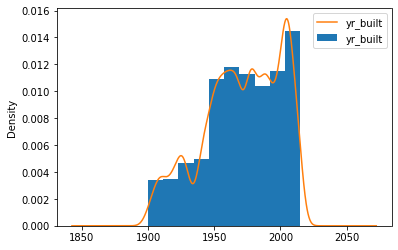

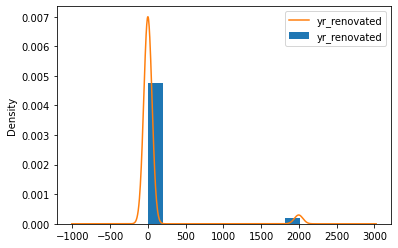

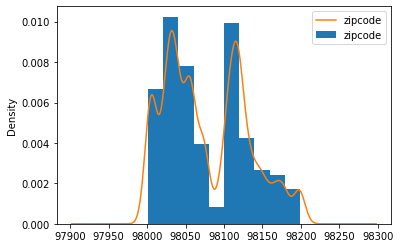

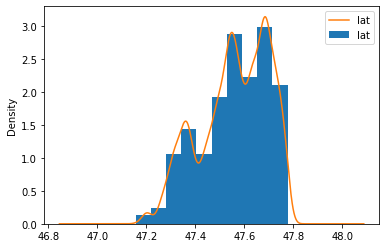

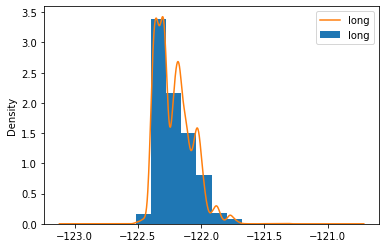

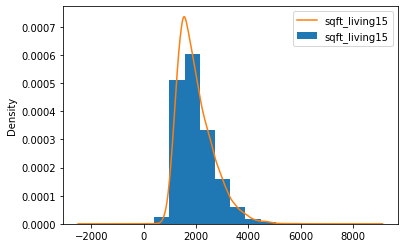

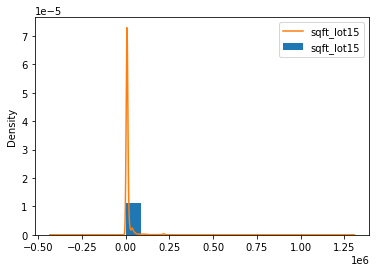

In [ ]:
#KDE Plots
headers = list(house_df_eda)
for column in headers:
	house_df_eda[column].plot.hist(density=True)
	house_df_eda[column].plot.kde(label=column)
	plt.legend()
	plt.show()

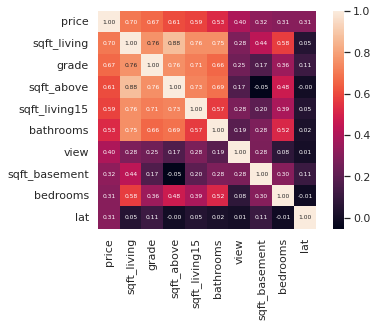

In [ ]:
corrmat = house_df_eda.corr()
cols = corrmat.nlargest(10, 'price').index

corrmat2 = house_df_eda[cols].corr()
sns.set(font_scale=1)
sns.heatmap(corrmat2, annot=True,annot_kws={'size': 6}, square=True, fmt='.2f')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


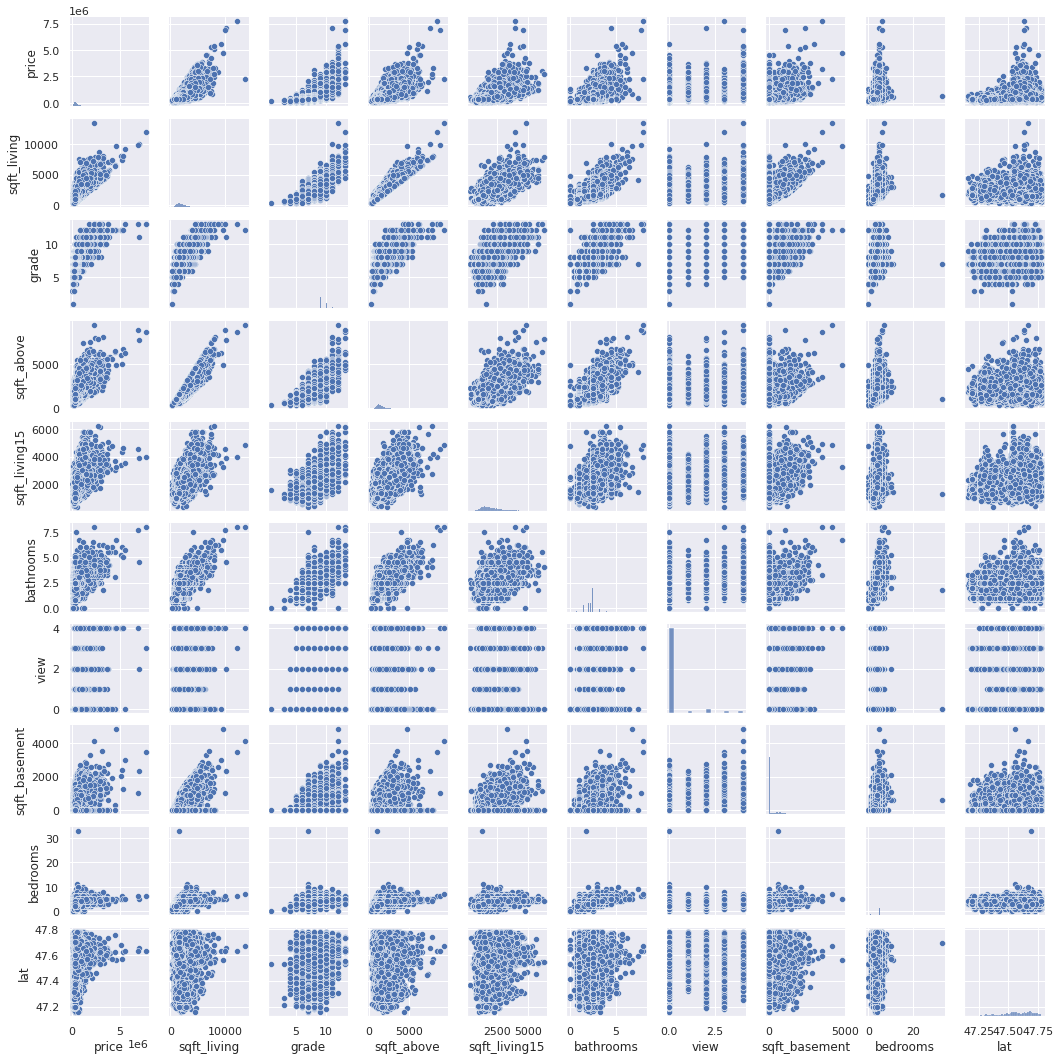

In [ ]:
corrmat = house_df_eda.corr()
cols = corrmat.nlargest(10, 'price').index

sns.set() #RESET
sns.pairplot(house_df_eda[cols], size = 1.5)
plt.show()

**Phân loại các outliers (điểm dị biệt)**

In [ ]:
house_df_eda.loc[:5, ~house_df_eda.columns.isin(['id'])]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [ ]:
outliers = {}
for feature in num_attributes.loc[:, ~num_attributes.columns.isin(['id'])].columns:
    outliers[feature] = iqr(num_attributes[feature], 1.5)

In [ ]:
outliers['bedrooms'].unique()

array([ 1,  6,  7,  0,  8,  9, 11, 10, 33])

In [ ]:
house_df_eda_inconsistency = house_df_eda.copy(deep=True)

In [ ]:
house_df_eda_inconsistency.loc[house_df_eda_inconsistency['bedrooms'] == 0] #-> Những nhà có số phòng ngủ = 0
# Ở cột bathrooms có các giá trị lẻ như 0.5, 0.25: từng phụ kiện ở trong phòng tắm (như bồn rửa mặt, toilet,...) sẽ được tính là 0.25

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [ ]:
house_df_eda_inconsistency.loc[house_df_eda_inconsistency['bedrooms'] == 33] #-> Những nhà có số phòng ngủ = 33 nhưng diện tích = 1040 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [ ]:
house_df_eda_inconsistency.yr_renovated.sort_values().unique() #-> renovated  = 0 -> những nhà chưa từng được sửa chữa

array([   0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [ ]:
len(house_df_eda_inconsistency.loc[house_df_eda_inconsistency['yr_renovated'] == 0])

20699

In [ ]:
house_df_eda_inconsistency['living_area_above_and_basement'] = house_df_eda_inconsistency['sqft_living'] - (house_df_eda_inconsistency['sqft_above'] + house_df_eda_inconsistency['sqft_basement'])

In [ ]:
house_df_eda_inconsistency.loc[house_df_eda_inconsistency['living_area_above_and_basement'] < 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,living_area_above_and_basement


**Data Preparation**

In [ ]:
house_df_fs = house_df_eda[['id','price','condition','grade','zipcode','bedrooms','bathrooms','sqft_living','sqft_above','sqft_basement', 'sqft_lot','lat','long']]

In [ ]:
#Do giá trị ban đầu của 4 thuộc tính là feet nên đổi sang mét vuông
house_df_fs[['m2_living','m2_above','m2_basement','m2_lot']] = house_df_fs[['sqft_living','sqft_above','sqft_basement','sqft_lot']] * 0.0929

house_df_fs.drop(['sqft_living','sqft_above','sqft_basement','sqft_lot'], axis=1, inplace=True)

house_df_fs.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,price,condition,grade,zipcode,bedrooms,bathrooms,lat,long,m2_living,m2_above,m2_basement,m2_lot
0,7129300520,221900.0,3,7,98178,3,1.00,47.5112,-122.257,109.622,109.622,0.000,524.8850
1,6414100192,538000.0,3,7,98125,3,2.25,47.7210,-122.319,238.753,201.593,37.160,672.7818
2,5631500400,180000.0,3,6,98028,2,1.00,47.7379,-122.233,71.533,71.533,0.000,929.0000
3,2487200875,604000.0,5,7,98136,4,3.00,47.5208,-122.393,182.084,97.545,84.539,464.5000
4,1954400510,510000.0,3,8,98074,3,2.00,47.6168,-122.045,156.072,156.072,0.000,750.6320


In [ ]:
#Tổng diện tích căn nhà = m2_living + m2_lot
house_df_fs['house_total_m2'] = house_df_fs['m2_living'] + house_df_fs['m2_lot']

house_df_fs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,price,condition,grade,zipcode,bedrooms,bathrooms,lat,long,m2_living,m2_above,m2_basement,m2_lot,house_total_m2
0,7129300520,221900.0,3,7,98178,3,1.00,47.5112,-122.257,109.622,109.622,0.000,524.8850,634.5070
1,6414100192,538000.0,3,7,98125,3,2.25,47.7210,-122.319,238.753,201.593,37.160,672.7818,911.5348
2,5631500400,180000.0,3,6,98028,2,1.00,47.7379,-122.233,71.533,71.533,0.000,929.0000,1000.5330
3,2487200875,604000.0,5,7,98136,4,3.00,47.5208,-122.393,182.084,97.545,84.539,464.5000,646.5840
4,1954400510,510000.0,3,8,98074,3,2.00,47.6168,-122.045,156.072,156.072,0.000,750.6320,906.7040


In [ ]:
#Giá nhà tính trên từng mét vuông
house_df_fs['price_m2'] = house_df_fs['price']/house_df_fs['house_total_m2']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
num_attr_fs = select_num_attr(house_df_fs)
bound_dist = 1.5

In [ ]:
descriptive_stats(num_attr_fs,bound_dist)

,mean,std,minimum,p1,p5,lower_bound,q1,mode,median,q3,upper_bound,p95,p99,maximum,skew,kurtosis
id,4.580302e+09,2.876566e+09,1.000102e+06,1.220339e+08,5.124803e+08,-5.655728e+09,2.123049e+09,7.950006e+08,3.904930e+09,7.308900e+09,1.508768e+10,9.297300e+09,9.558728e+09,9.900000e+09,0.243329,-1.260542
price,5.400881e+05,3.671272e+05,7.500000e+04,1.535004e+05,2.100000e+05,-1.626250e+05,3.219500e+05,3.500000e+05,4.500000e+05,6.450000e+05,1.129575e+06,1.156480e+06,1.964400e+06,7.700000e+06,4.024069,34.585540
condition,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,1.500000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.500000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.032805,0.525764
grade,7.656873e+00,1.175459e+00,1.000000e+00,5.000000e+00,6.000000e+00,5.500000e+00,7.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,9.500000e+00,1.000000e+01,1.100000e+01,1.300000e+01,0.771103,1.190932
zipcode,9.807794e+04,5.350503e+01,9.800100e+04,9.800100e+04,9.800400e+04,9.790550e+04,9.803300e+04,9.810300e+04,9.806500e+04,9.811800e+04,9.824550e+04,9.817700e+04,9.819900e+04,9.819900e+04,0.405661,-0.853479
bedrooms,3.370842e+00,9.300618e-01,0.000000e+00,2.000000e+00,2.000000e+00,1.500000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.500000e+00,5.000000e+00,6.000000e+00,3.300000e+01,1.974300,49.063653
bathrooms,2.114757e+00,7.701632e-01,0.000000e+00,1.000000e+00,1.000000e+00,6.250000e-01,1.750000e+00,2.500000e+00,2.250000e+00,2.500000e+00,3.625000e+00,3.500000e+00,4.250000e+00,8.000000e+00,0.511108,1.279902
lat,4.756005e+01,1.385637e-01,4.715590e+01,4.725687e+01,4.731030e+01,4.716050e+01,4.747100e+01,4.753220e+01,4.757180e+01,4.767800e+01,4.798850e+01,4.774964e+01,4.777269e+01,4.777760e+01,-0.485270,-0.676313
long,-1.222139e+02,1.408283e-01,-1.225190e+02,-1.224080e+02,-1.223870e+02,-1.226325e+02,-1.223280e+02,-1.222900e+02,-1.222300e+02,-1.221250e+02,-1.218205e+02,-1.219790e+02,-1.217830e+02,-1.213150e+02,0.885053,1.049501
m2_living,1.932227e+02,8.532316e+01,2.694100e+01,6.688800e+01,8.732600e+01,-2.392175e+01,1.325683e+02,1.207700e+02,1.774390e+02,2.368950e+02,3.933850e+02,3.493040e+02,4.625305e+02,1.257866e+03,1.471555,5.243093


In [ ]:
group_descriptive_stats(num_attr_fs,'zipcode','m2_living',bound_dist)

,mean,std,minimum,p1,p5,lower_bound,q1,mode,median,q3,upper_bound,p95,p99,maximum,skew,kurtosis
zipcode,,,,,,,,,,,,,,,,
98001,176.589555,60.873695,71.533,79.314304,93.82900,22.296000,133.77600,106.835,169.2638,208.096000,319.576000,285.137970,360.260626,505.3760,1.114860,2.606776
98002,151.217391,50.070549,64.101,70.529680,85.46800,5.713350,112.87350,118.912,145.8530,184.313600,291.473750,237.638200,271.862560,330.7240,0.710437,0.248367
98003,179.193151,68.436196,70.604,88.208550,93.82900,9.766113,130.06000,120.770,165.3620,210.255925,330.549812,295.974755,422.506413,536.4046,1.826365,5.745579
98004,270.248151,121.547446,79.894,88.961040,114.26700,-92.900000,177.43900,195.090,247.1140,357.665000,628.004000,470.631400,616.075640,932.7160,1.150115,2.756151
98005,246.817052,84.382910,91.042,102.840300,139.67515,49.353125,191.14175,209.954,232.7145,285.667500,427.456125,408.945800,488.867670,609.7027,1.056960,1.900914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,215.837667,99.148302,50.166,70.678320,101.72550,-9.754500,150.49800,156.072,196.9480,257.333000,417.585500,376.059200,562.453760,805.4430,2.017979,7.713069
98178,160.656721,65.668015,53.882,62.493830,73.39100,-19.973500,109.62200,79.894,160.2525,196.019000,325.614500,282.323100,358.547550,458.9260,0.900090,1.475908
98188,167.477524,68.452634,62.243,63.172000,73.39100,0.929000,123.55700,123.557,157.0010,205.309000,327.937000,307.266750,365.468600,415.2630,0.986878,1.196158


In [ ]:
group_descriptive_stats(num_attr_fs,'zipcode','m2_lot',bound_dist)

,mean,std,minimum,p1,p5,lower_bound,q1,mode,median,q3,upper_bound,p95,p99,maximum,skew,kurtosis
zipcode,,,,,,,,,,,,,,,,
98001,1387.689131,1968.719645,191.7456,357.739320,408.760000,-328.587300,672.851475,408.7600,862.76230,1340.477325,2341.916100,4382.432085,7684.673136,22256.9820,6.155843,50.573471
98002,698.388121,307.285221,260.1200,260.120000,303.076960,-16.931025,489.118500,557.4000,676.49780,826.484850,1332.534375,1167.019090,1712.332800,2468.7246,1.735210,6.349763
98003,985.027658,691.780108,120.9558,190.630800,570.299165,227.349525,710.615325,682.8150,819.00640,1032.792525,1516.058325,1654.349265,3921.282059,7365.0191,5.303523,37.077691
98004,1217.382114,598.380059,72.3691,121.435164,646.806960,-195.322250,824.859100,753.6977,1032.95510,1504.980000,2525.161350,2113.010500,3769.525264,4123.2736,1.807768,5.657242
98005,1851.384193,1639.364103,236.9879,250.084013,674.848825,-1191.999900,922.078950,1018.1840,1135.23800,2331.464850,4445.543700,4635.784320,9229.130062,10453.2009,2.535811,8.633823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,1105.919124,962.602746,118.8191,149.648894,475.090600,191.513350,698.747350,752.4900,762.70900,1036.903350,1544.137350,2695.651430,6116.182980,7122.1785,3.656652,16.747070
98178,771.917447,470.749837,278.7000,278.700000,395.986250,95.315400,557.400000,557.4000,668.88000,865.456400,1327.541000,1358.945845,2010.185993,6312.8337,6.957036,74.639463
98188,940.712914,379.722784,319.1115,341.728005,663.468575,408.295500,757.924650,808.2300,828.01770,991.010750,1340.639900,1671.410350,2655.778750,2831.2204,2.713440,9.560905


In [ ]:
#Phân tích:
#Dùng median price để phân loại vì median ít bị ảnh hưởng bởi các giá trị khác hơn so với mean
# x trong vòng lặp tương ứng với median price
house_df_fs['living_size'] = house_df_fs['m2_living'].apply(lambda x: 'small_house' if x <= 135
                                                                 else 'medium_house' if (x > 135) and (x <= 280)
                                                                 else 'large_house')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
house_df_fs.living_size.value_counts()

medium_house    12829
small_house      5753
large_house      3031
Name: living_size, dtype: int64

In [ ]:
# house_df_fs.lot_size.value_counts()

In [ ]:
house_df_fs['house_type'] = house_df_fs['house_total_m2'].apply(lambda x: 'apartment' if x <= 200
                                                                     else 'villa' if (x > 200) and (x <= 400)
                                                                     else 'townhouse' if (x > 400) and (x <= 1000)
                                                                     else 'mansion' if (x > 1000) and (x <= 10000)
                                                                     else 'countryhouse')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
house_df_fs.house_type.value_counts()

townhouse       11574
mansion          7942
villa            1509
countryhouse      441
apartment         147
Name: house_type, dtype: int64

In [ ]:
house_df_ins = house_df_fs.copy(deep=True)

In [ ]:
house_df_ins['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
# Calculate its median price per region per living size and per lot size.

zipcode_median_price = house_df_ins[['price', 'zipcode','living_size']].groupby(['zipcode','living_size']).median().reset_index()
zipcode_median_price.columns = ['zipcode','living_size','median_price']

house_df_ins = pd.merge(house_df_fs,zipcode_median_price,on=['zipcode','living_size'],how='inner')

# Calculate its median price per m2 per region per living size and per lot size.

zipcode_median_price_m2 = house_df_ins[['price_m2', 'zipcode','living_size']].groupby(['zipcode','living_size']).median().reset_index()
zipcode_median_price_m2.columns = ['zipcode','living_size','median_price_m2']

house_df_ins = pd.merge(house_df_ins,zipcode_median_price_m2,on=['zipcode','living_size'],how='inner')

In [ ]:
#Cách phân loại:
#- Những nhà trong cùng khu vực, có price value < median price, condition trong khoảng [3,5] -> label: "to buy"
#- Những nhà trong cùng khu vực, có price value < median price, condition trong khoảng [0,2] -> lebel: "not worth buying"
#- Những nhà trong cùng khu vực, có price value > median price, condition > 3 -> lebel: "to compare"
#- Những nhà trong cùng khu vực, có price value > median price, condition == 3 -> lebel: "to consider"

# Create house recommendation system

house_df_ins['status'] = house_df_ins[['price','condition','median_price']].apply(lambda x: 'to buy' if (x[0] < x[2]) & (x[1] > 3)\
                                                                                     else 'to consider' if (x[0] < x[2]) & (x[1] == 3)\
                                                                                     else 'to compare' if (x[0] > x[2])  & (x[1] > 3)\
                                                                                     else 'not worth buying',  axis = 1)

In [ ]:
house_df_ins[['id','zipcode','price','median_price','price_m2','median_price_m2','condition','status']].sample(5)

,id,zipcode,price,median_price,price_m2,median_price_m2,condition,status
8094,9187200275,98122,905000.0,628000.0,1345.532831,1258.357464,3,not worth buying
12893,7443000640,98119,460000.0,552700.0,1455.057543,1799.169614,4,to buy
12601,3579000010,98028,428040.0,450000.0,403.603275,392.614607,3,to consider
470,7625701175,98136,465000.0,564500.0,606.712986,828.149572,3,to consider
8561,1311200460,98001,265000.0,276000.0,311.751869,278.974537,3,to consider


In [ ]:
house_df_ins.status.value_counts()

not worth buying    7337
to consider         6981
to compare          3750
to buy              3545
Name: status, dtype: int64

In [ ]:
recommended_houses_ordered  = house_df_ins.loc[(house_df_ins['status'] == 'to buy')].copy(deep=True)

In [ ]:
recommended_houses_ordered1  = house_df_ins.loc[(house_df_ins['status'] == 'to compare')].copy(deep=True)

In [ ]:
recommended_houses_ordered2  = house_df_ins.loc[(house_df_ins['status'] == 'to consider')].copy(deep=True)

In [ ]:
frames = [recommended_houses_ordered, recommended_houses_ordered1, recommended_houses_ordered2]
  
result = pd.concat(frames)
display(result)

,id,price,condition,grade,zipcode,bedrooms,bathrooms,lat,long,m2_living,m2_above,m2_basement,m2_lot,house_total_m2,price_m2,living_size,house_type,median_price,median_price_m2,status
1,4060000240,205425.0,4,6,98178,2,1.00,47.5009,-122.248,81.752,81.752,0.000,629.8620,711.6140,288.674759,small_house,townhouse,222900.0,298.763208,to buy
38,1180008315,212000.0,5,6,98178,3,1.00,47.4920,-122.224,96.616,96.616,0.000,631.7200,728.3360,291.074449,small_house,townhouse,222900.0,298.763208,to buy
55,7812800681,166000.0,4,6,98178,2,1.00,47.4955,-122.239,80.823,80.823,0.000,788.4423,869.2653,190.965865,small_house,townhouse,222900.0,298.763208,to buy
84,4059400585,218000.0,4,6,98178,3,1.00,47.5013,-122.244,81.752,81.752,0.000,1691.2445,1772.9965,122.955685,small_house,mansion,222900.0,298.763208,to buy
85,7689600630,216500.0,4,6,98178,2,1.00,47.4886,-122.246,65.959,65.959,0.000,646.5840,712.5430,303.841312,small_house,townhouse,222900.0,298.763208,to buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,475001235,870000.0,3,8,98107,5,4.00,47.6655,-122.363,315.860,215.528,100.332,464.5000,780.3600,1114.870060,large_house,townhouse,885000.0,1117.249241,to consider
21604,2767601280,848750.0,3,8,98107,6,3.75,47.6748,-122.384,293.564,293.564,0.000,464.5000,758.0640,1119.628422,large_house,townhouse,885000.0,1117.249241,to consider
21606,2769600305,715000.0,3,8,98107,6,2.75,47.6728,-122.362,315.860,265.694,50.166,464.5000,780.3600,916.243785,large_house,townhouse,885000.0,1117.249241,to consider
21607,475000605,800000.0,3,8,98107,4,3.00,47.6678,-122.361,327.008,183.942,143.066,454.7455,781.7535,1023.340478,large_house,townhouse,885000.0,1117.249241,to consider


In [ ]:
recommended_houses_ordered.head()

,id,price,condition,grade,zipcode,bedrooms,bathrooms,lat,long,m2_living,m2_above,m2_basement,m2_lot,house_total_m2,price_m2,living_size,house_type,median_price,median_price_m2,status
1,4060000240,205425.0,4,6,98178,2,1.0,47.5009,-122.248,81.752,81.752,0.0,629.8620,711.6140,288.674759,small_house,townhouse,222900.0,298.763208,to buy
38,1180008315,212000.0,5,6,98178,3,1.0,47.4920,-122.224,96.616,96.616,0.0,631.7200,728.3360,291.074449,small_house,townhouse,222900.0,298.763208,to buy
55,7812800681,166000.0,4,6,98178,2,1.0,47.4955,-122.239,80.823,80.823,0.0,788.4423,869.2653,190.965865,small_house,townhouse,222900.0,298.763208,to buy
84,4059400585,218000.0,4,6,98178,3,1.0,47.5013,-122.244,81.752,81.752,0.0,1691.2445,1772.9965,122.955685,small_house,mansion,222900.0,298.763208,to buy
85,7689600630,216500.0,4,6,98178,2,1.0,47.4886,-122.246,65.959,65.959,0.0,646.5840,712.5430,303.841312,small_house,townhouse,222900.0,298.763208,to buy


In [ ]:
recommended_houses_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3545 entries, 1 to 21598
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3545 non-null   int64  
 1   price            3545 non-null   float64
 2   condition        3545 non-null   int64  
 3   grade            3545 non-null   int64  
 4   zipcode          3545 non-null   int64  
 5   bedrooms         3545 non-null   int64  
 6   bathrooms        3545 non-null   float64
 7   lat              3545 non-null   float64
 8   long             3545 non-null   float64
 9   m2_living        3545 non-null   float64
 10  m2_above         3545 non-null   float64
 11  m2_basement      3545 non-null   float64
 12  m2_lot           3545 non-null   float64
 13  house_total_m2   3545 non-null   float64
 14  price_m2         3545 non-null   float64
 15  living_size      3545 non-null   object 
 16  house_type       3545 non-null   object 
 17  median_price 

In [ ]:
recommended_houses_ordered.shape[0]

3545

In [ ]:
recommended_houses_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3545 entries, 1 to 21598
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3545 non-null   int64  
 1   price            3545 non-null   float64
 2   condition        3545 non-null   int64  
 3   grade            3545 non-null   int64  
 4   zipcode          3545 non-null   int64  
 5   bedrooms         3545 non-null   int64  
 6   bathrooms        3545 non-null   float64
 7   lat              3545 non-null   float64
 8   long             3545 non-null   float64
 9   m2_living        3545 non-null   float64
 10  m2_above         3545 non-null   float64
 11  m2_basement      3545 non-null   float64
 12  m2_lot           3545 non-null   float64
 13  house_total_m2   3545 non-null   float64
 14  price_m2         3545 non-null   float64
 15  living_size      3545 non-null   object 
 16  house_type       3545 non-null   object 
 17  median_price 

In [ ]:
result = recommended_houses_ordered.drop('id', 1)
result = result.drop(result.columns[1:3],axis=1)
result = result.drop(result.columns[10:13],axis=1)
result = result.drop(result.columns[11:15],axis=1)
result = result.drop('house_type', 1)

# result = recommended_houses_ordered.drop('id', 1)
# result = result.drop(result.columns[1:3],axis=1)
# result = result.drop(result.columns[10:14],axis=1)
# result = result.drop(result.columns[11:15],axis=1)
# result = result.drop('house_type', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3545 entries, 1 to 21598
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        3545 non-null   float64
 1   zipcode      3545 non-null   int64  
 2   bedrooms     3545 non-null   int64  
 3   bathrooms    3545 non-null   float64
 4   lat          3545 non-null   float64
 5   long         3545 non-null   float64
 6   m2_living    3545 non-null   float64
 7   m2_above     3545 non-null   float64
 8   m2_basement  3545 non-null   float64
 9   m2_lot       3545 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 304.6 KB


In [ ]:
result # Đây là những thuộc tính mà user sẽ nhập vào

,price,zipcode,bedrooms,bathrooms,lat,long,m2_living,m2_above,m2_basement,m2_lot
1,205425.0,98178,2,1.00,47.5009,-122.248,81.752,81.752,0.000,629.8620
38,212000.0,98178,3,1.00,47.4920,-122.224,96.616,96.616,0.000,631.7200
55,166000.0,98178,2,1.00,47.4955,-122.239,80.823,80.823,0.000,788.4423
84,218000.0,98178,3,1.00,47.5013,-122.244,81.752,81.752,0.000,1691.2445
85,216500.0,98178,2,1.00,47.4886,-122.246,65.959,65.959,0.000,646.5840
...,...,...,...,...,...,...,...,...,...,...
21578,350000.0,98031,4,2.75,47.3954,-122.184,314.931,183.013,131.918,1500.6137
21587,1320000.0,98039,3,2.75,47.6304,-122.234,248.972,169.078,79.894,1867.6616
21588,865000.0,98039,3,1.50,47.6354,-122.234,142.137,142.137,0.000,1005.8283
21589,1000000.0,98039,3,2.25,47.6322,-122.232,213.670,106.835,106.835,1481.9408


In [ ]:
X = result.drop('price', axis=1)
y = result['price']

In [ ]:
# recommended_houses_ordered.dtypes
result.dtypes

price          float64
zipcode          int64
bedrooms         int64
bathrooms      float64
lat            float64
long           float64
m2_living      float64
m2_above       float64
m2_basement    float64
m2_lot         float64
dtype: object

In [ ]:
result['price']

1         205425.0
38        212000.0
55        166000.0
84        218000.0
85        216500.0
           ...    
21578     350000.0
21587    1320000.0
21588     865000.0
21589    1000000.0
21598     365000.0
Name: price, Length: 3545, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
val_X = X_test
train_X = X_train

In [ ]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (2658, 9)
X_test: (887, 9)
y_train: (2658,)
y_test: (887,)


In [ ]:
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
result.head(50)

,price,zipcode,bedrooms,bathrooms,lat,long,m2_living,m2_above,m2_basement,m2_lot
1,205425.0,98178,2,1.00,47.5009,-122.248,81.752,81.752,0.000,629.8620
38,212000.0,98178,3,1.00,47.4920,-122.224,96.616,96.616,0.000,631.7200
55,166000.0,98178,2,1.00,47.4955,-122.239,80.823,80.823,0.000,788.4423
84,218000.0,98178,3,1.00,47.5013,-122.244,81.752,81.752,0.000,1691.2445
85,216500.0,98178,2,1.00,47.4886,-122.246,65.959,65.959,0.000,646.5840
93,220000.0,98178,3,2.00,47.4968,-122.277,130.989,130.989,0.000,743.0142
113,397500.0,98125,3,1.25,47.7289,-122.283,140.279,75.249,65.030,1276.1673
121,359000.0,98125,4,1.50,47.7055,-122.300,175.581,175.581,0.000,562.2308
134,420000.0,98125,3,1.75,47.7336,-122.290,159.788,79.894,79.894,752.6758
135,320000.0,98125,3,1.00,47.7270,-122.300,165.362,165.362,0.000,635.4360


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [ ]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of the linear regression model is:", linreg_mae)
print("MSE of the linear regression model is:", linreg_mse)
print("R2 score of the linear regression model is:", linreg_r2)

MAE of the linear regression model is: 98616.94665529374
MSE of the linear regression model is: 21067155019.296333
R2 score of the linear regression model is: 0.6155524407039084


In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [ ]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print("MAE of the decision tree model is:", dtree_mae)
print("MSE of the decision tree model is:", dtree_mse)
print("R2 score of the decision tree model is:", dtree_r2)

MAE of the decision tree model is: 60218.589627959416
MSE of the decision tree model is: 10217265499.48929
R2 score of the decision tree model is: 0.8135484938350247


In [ ]:
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

In [ ]:
rforest_mae = mean_absolute_error(y_test, rforest_pred)
rforest_mse = mean_squared_error(y_test, rforest_pred)
rforest_r2 = r2_score(y_test, rforest_pred)
print("MAE of the random forest model is:", rforest_mae)
print("MSE of the random forest model is:", rforest_mse)
print("R2 score of the random forest model is:", rforest_r2)

MAE of the random forest model is: 46301.58198233747
MSE of the random forest model is: 5756685649.71532
R2 score of the random forest model is: 0.8949481434184742


In [ ]:
#Do random forest cho kết quả tốt nhất -> dùng mô hình random forest để dự đoán
rforest = RandomForestRegressor()
rforest.fit(train_X, y_train)

RandomForestRegressor()

In [ ]:
#Prediction using test data
print("Making predictions for the following 5 houses:")
print(val_X.head())
print("The predictions are:")
print(rforest.predict(val_X.head()))

Making predictions for the following 5 houses:
       zipcode  bedrooms  bathrooms      lat     long  m2_living  m2_above  \
21091    98115         5       3.00  47.6771 -122.319    281.487   179.297   
20651    98006         3       1.75  47.5683 -122.178    130.989   130.989   
2670     98103         4       2.50  47.6605 -122.355    211.812   141.208   
8376     98004         3       2.25  47.5873 -122.193    221.102   221.102   
17617    98031         3       2.50  47.4093 -122.173    165.362   116.125   

       m2_basement     m2_lot  
21091      102.190   382.7480  
20651        0.000   850.0350  
2670        70.604   225.9328  
8376         0.000  1040.4800  
17617       49.237   668.1368  
The predictions are:
[780997.5  413818.35 583649.5  792225.   270076.22]


In [ ]:
data = {'zipcode': 98136, 'bedrooms': 1, 'bathrooms': 2, 'lat': 47, 'long': -122,
        'm2_living':180, 'm2_above':119,'m2_basement':60, 'm2_lot':172}
index = [0]
new_df = pd.DataFrame(data, index)
new_df

,zipcode,bedrooms,bathrooms,lat,long,m2_living,m2_above,m2_basement,m2_lot
0,98136,1,2,47,-122,180,119,60,172


In [ ]:
new_df.columns

Index(['zipcode', 'bedrooms', 'bathrooms', 'lat', 'long', 'm2_living',
       'm2_above', 'm2_basement', 'm2_lot'],
      dtype='object')

In [ ]:
value_pred = rforest.predict(new_df)
print("The median housing value for the new data is: ", value_pred)

The median housing value for the new data is:  [235907.98]
